# ***Penguins Descriptive Analysis and Statistical Relationship***

# **Importing Libraries**

In [20]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install google-colab

# **Importing Libraries**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***Generate Random SEED and RandomState***

In [21]:
# Generate random SEED
np.random.seed(2023)
SEED = (int) ((np.random.rand()) * (14+8))
STATE = np.random.mtrand.RandomState(SEED)
print(SEED)
print(STATE)

7
RandomState(MT19937)


### ***Load the data from local repository***

In [22]:
# load the required data
PATH = './data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv'))
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### ***Load date from Google Drive***

In [ ]:
# load data from  google drive
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/My Drive/data/'
data = pd.read_csv(os.path.join(PATH,'penguins.csv')) # change path to your path
data.head()

### ***Data Preprocessing, Cleaning and Validation***

In this section, we do the following as accorded in the instructions
- Data validation
- Data Preprocessing
- Data Cleaning

##### *Data Type Check*

In [24]:
# data type check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


##### *Check for missing values*

In [25]:
# check for missing values
data.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

##### Check for repeated values

In [26]:
# check for repeated values
data.duplicated().sum()

0

##### *Extract numerical columns*

In [27]:
# list numeric columns
numericals =['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

numericals

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

##### *Extract categorical columns*

In [28]:
# list categorical columns
categorical = ['sex', 'island', 'species']
categorical

['sex', 'island', 'species']

##### *Check for outliers*

In [29]:
# check for outliers
data[numericals].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [30]:
data[numericals].skew()

bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
dtype: float64

##### *Check for data distribution for numerical variables*

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

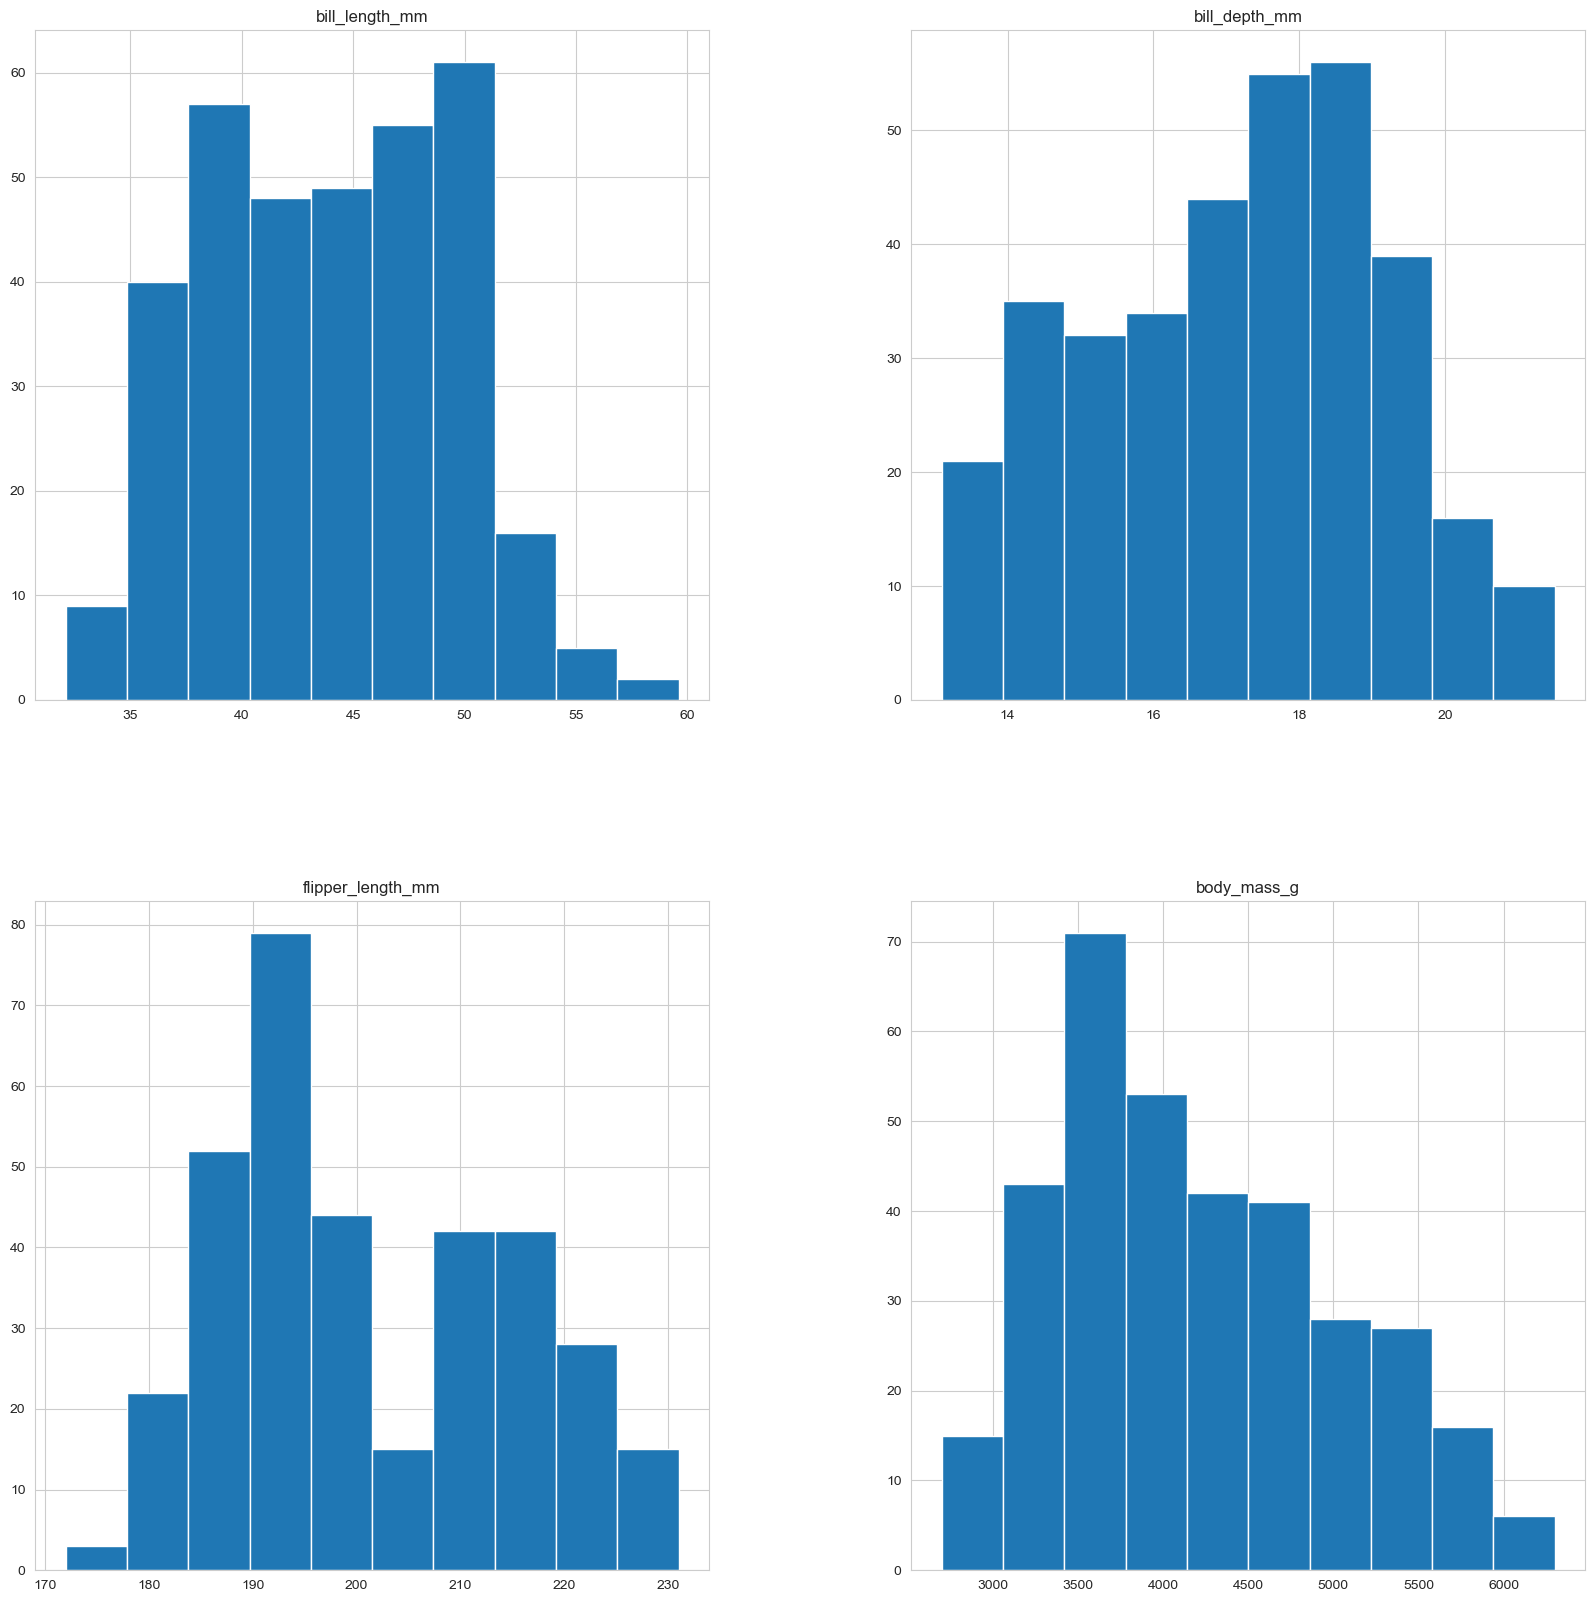

In [31]:
# check for data distribution for numerical variables
data[numericals].hist(figsize=(20,20))

##### *Check for correlation between variables*

In [13]:
# check for correlation between variables
data[numericals].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

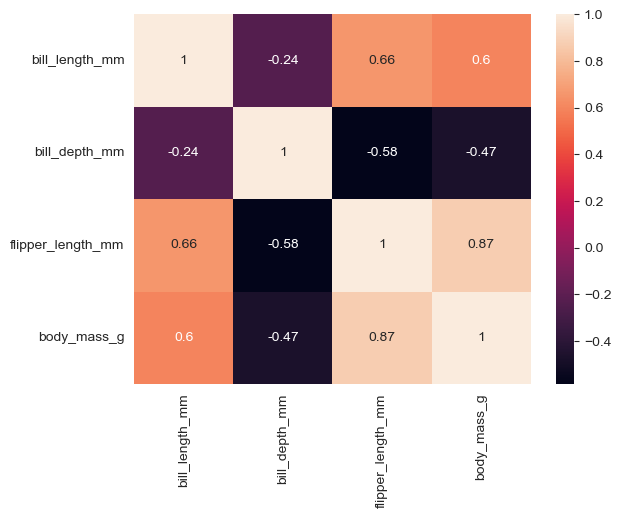

In [14]:
sns.heatmap(data[numericals].corr(), annot=True)

##### *Check for multicollinearity*

<Axes: >

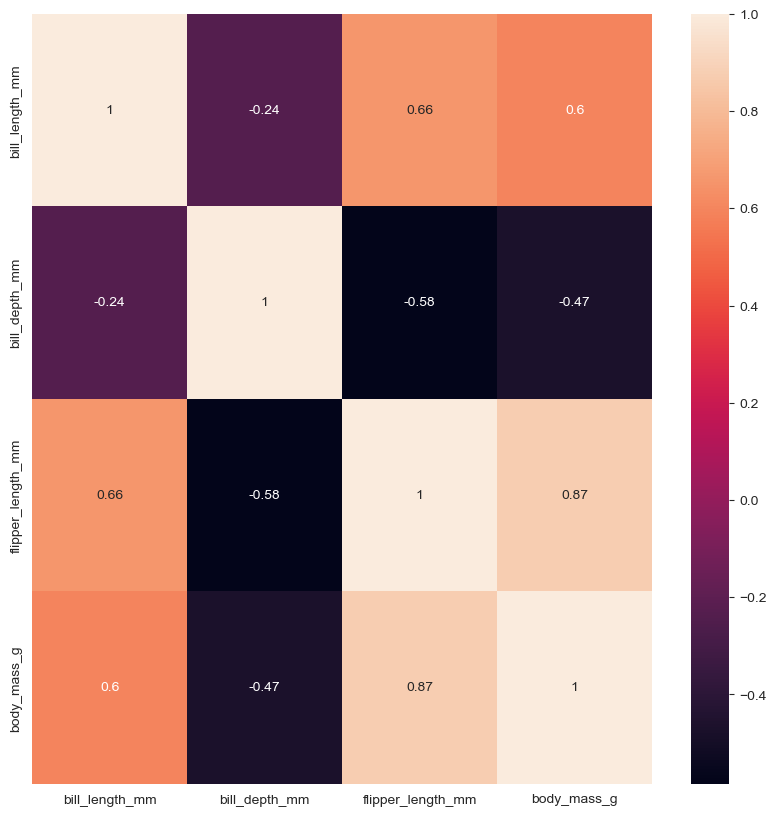

In [15]:
# check for multicollinearity
plt.figure(figsize=(10,10))
sns.heatmap(data[numericals].corr(), annot=True)

##### *Check for Counts for Categorical variables*

In [16]:
# check for counts for categorical variables
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

male      168
female    165
Name: sex, dtype: int64


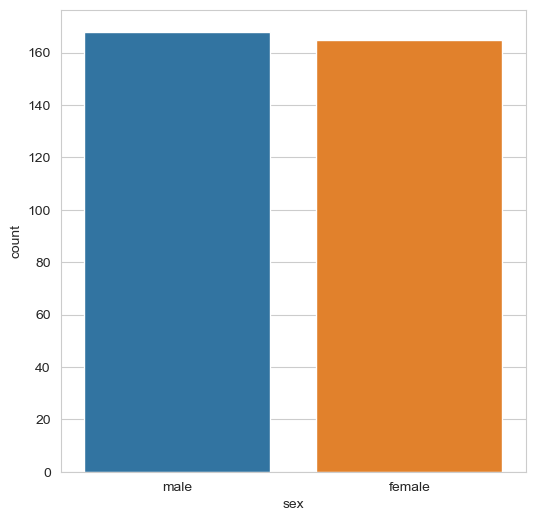

In [17]:
# sex
categorical_valcount_hist(categorical[0])

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


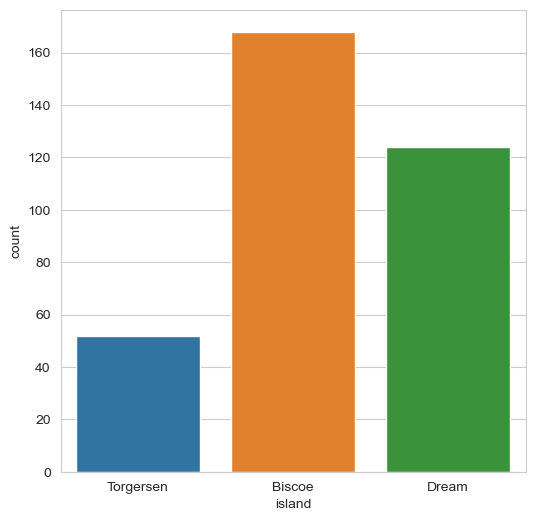

In [18]:
# island
categorical_valcount_hist(categorical[1])

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


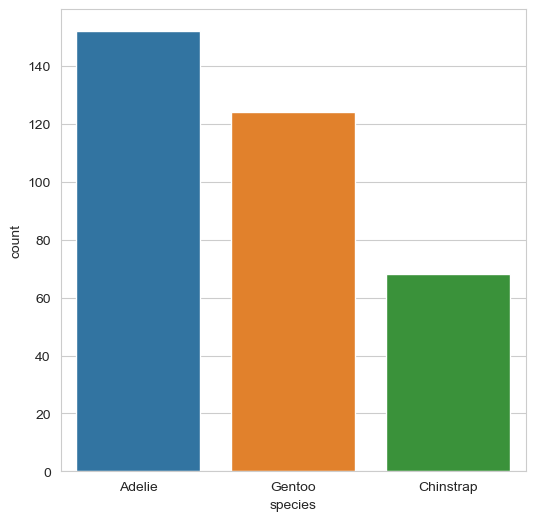

In [19]:
# species
categorical_valcount_hist(categorical[2])